#Import Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankushnarwade/ai-impact-on-student-performance")

print("Path to dataset files:", path)

100%|██████████| 268k/268k [00:00<00:00, 52.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankushnarwade/ai-impact-on-student-performance/versions/1


#Exploratory Data Analysis

##Dataset Description

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv(path + "/ai_impact_student_performance_dataset.csv")
dataframe.head()

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low


In [ ]:
print(dataframe.shape[1])
dataframe.shape[0]

26


8000

In [ ]:
dataframe.describe()

,student_id,age,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,last_exam_score,...,attendance_percentage,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed
count,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,18.96725,3.286938,0.641000,88.989875,5.515125,50.057500,59.359500,5.472375,59.501250,...,69.852112,5.484750,5.516450,10.127325,6.465025,3.010600,2.523387,5.463375,56.811988,0.889250
std,2309.54541,3.15316,1.582171,0.479737,52.184077,2.883064,29.440109,34.869496,2.872067,23.161888,...,17.234339,2.898546,2.586377,17.479288,1.435670,1.744974,1.436991,2.881917,13.455724,0.313842
min,1.00000,14.00000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,...,40.000000,1.000000,1.000000,-20.000000,4.000000,0.000000,0.000000,1.000000,12.700000,0.000000
25%,2000.75000,16.00000,1.900000,0.000000,43.000000,3.000000,25.000000,29.000000,3.000000,39.750000,...,54.800000,3.000000,3.200000,-5.000000,5.200000,1.500000,1.300000,3.000000,47.300000,1.000000
50%,4000.50000,19.00000,3.300000,1.000000,89.000000,6.000000,50.000000,59.000000,6.000000,59.000000,...,70.000000,5.000000,5.500000,10.150000,6.400000,3.000000,2.500000,5.000000,56.900000,1.000000
75%,6000.25000,22.00000,4.600000,1.000000,134.000000,8.000000,76.000000,90.000000,8.000000,80.000000,...,84.600000,8.000000,7.800000,25.500000,7.700000,4.500000,3.800000,8.000000,66.200000,1.000000
max,8000.00000,24.00000,6.000000,1.000000,179.000000,10.000000,100.000000,119.000000,10.000000,99.000000,...,100.000000,10.000000,10.000000,40.000000,9.000000,6.000000,5.000000,10.000000,95.800000,1.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       8000 non-null   int64  
 1   age                              8000 non-null   int64  
 2   gender                           8000 non-null   object 
 3   grade_level                      8000 non-null   object 
 4   study_hours_per_day              8000 non-null   float64
 5   uses_ai                          8000 non-null   int64  
 6   ai_usage_time_minutes            8000 non-null   int64  
 7   ai_tools_used                    6638 non-null   object 
 8   ai_usage_purpose                 6654 non-null   object 
 9   ai_dependency_score              8000 non-null   int64  
 10  ai_generated_content_percentage  8000 non-null   int64  
 11  ai_prompts_per_week              8000 non-null   int64  
 12  ai_ethics_score     

##Basic Visualization

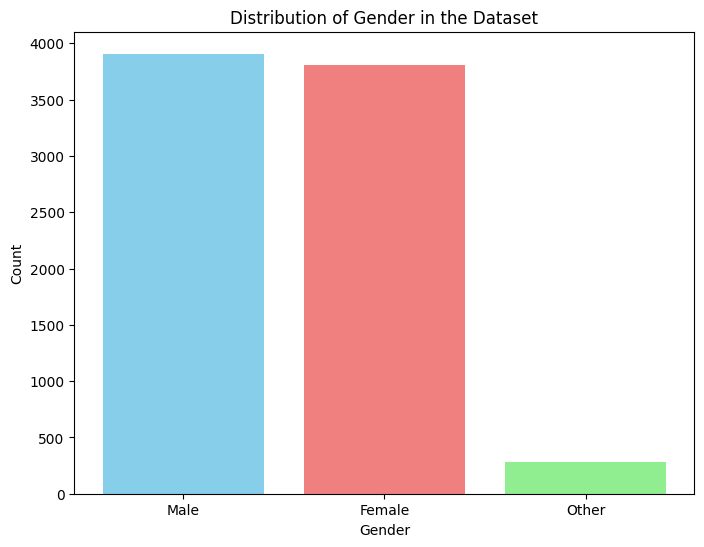

In [ ]:
gender_counts = dataframe['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in the Dataset')
plt.show()

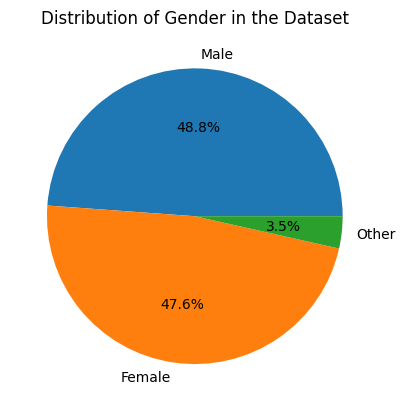

In [ ]:
label = gender_counts.index
size = gender_counts.values

fig, ax = plt.subplots()
ax.pie(size, labels=label, autopct='%1.1f%%')
plt.title('Distribution of Gender in the Dataset')
plt.show()

In [ ]:
dataframe.isna().sum()

,0
student_id,0
age,0
gender,0
grade_level,0
study_hours_per_day,0
uses_ai,0
ai_usage_time_minutes,0
ai_tools_used,1362
ai_usage_purpose,1346
ai_dependency_score,0


In [ ]:
nan_rows = dataframe[dataframe.isna().any(axis=1)]
display(nan_rows.head())

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
6,7,23,Female,1st Year,2.0,1,112,ChatGPT+Gemini,NaN,8,...,9,9.6,3.7,5.8,1.6,3.4,5,82.2,1,High
8,9,20,Female,10th,6.0,1,32,Copilot,NaN,9,...,9,7.8,18.8,5.4,1.6,4.2,4,81.7,1,High
9,10,24,Female,1st Year,5.6,0,140,NaN,Doubt Solving,3,...,7,2.9,38.5,7.2,0.7,4.6,1,66.7,1,Medium


In [ ]:
dataframe = dataframe.reset_index(drop=True)

#Machine Learning Implementations

##Data Preprocessing

Checking on dataset's balance class

In [ ]:
num_of_positive=dataframe['passed'].value_counts()[1]
num_of_negative=dataframe['passed'].value_counts()[0]
print("number of data on positive class is ",num_of_positive)
print("number of data on negative class is ",num_of_negative)

number of data on positive class is  7114
number of data on negative class is  886


Select numeric-only data from dataset

In [3]:
numeric_feature = dataframe.select_dtypes(include=[np.number])
numeric_feature.head()

,student_id,age,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,last_exam_score,...,attendance_percentage,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed
0,1,20,2.5,1,170,10,29,56,5,29,...,98.8,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0
1,2,17,3.4,1,123,4,14,65,1,60,...,89.3,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1
2,3,24,0.8,0,35,8,82,8,5,98,...,50.8,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1
3,4,21,4.4,0,45,3,74,106,10,67,...,52.1,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1
4,5,18,3.5,1,21,2,83,7,10,40,...,40.7,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1


Duplicates

In [4]:
numeric_feature.duplicated().sum()

np.int64(0)

Data imputation

In [5]:
numeric_feature = numeric_feature.fillna(numeric_feature.mean())
numeric_feature.isna().sum()

,0
student_id,0
age,0
study_hours_per_day,0
uses_ai,0
ai_usage_time_minutes,0
ai_dependency_score,0
ai_generated_content_percentage,0
ai_prompts_per_week,0
ai_ethics_score,0
last_exam_score,0


Resampling Data

In [7]:
from imblearn.under_sampling import OneSidedSelection
os = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
x_numer = numeric_feature.drop(['passed'], axis=1)
y_numer = numeric_feature['passed']
X_resampled, y_resampled = os.fit_resample(x_numer, y_numer)

##XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

#numeric feature
y = numeric_feature['passed']
X = numeric_feature.drop(['passed'], axis=1)

#split data then turn into DMatrix
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test)

#initialize model, train, and predict test data with model
params = {"objective":"binary:logistic", "max_depth":50, "learning_rate":0.1 }
model = xgb.train(
    params=params,
    dtrain = d_train,
    num_boost_round=100)
preds = model.predict(d_test)

print("Accuracy:", accuracy_score(np.round(preds), y_test))

Accuracy: 1.0


In [10]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#numeric feature
y = y_resampled
X = X_resampled

#split data then turn into DMatrix
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test)

#initialize model, train, and predict test data with model
params = {"objective":"binary:logistic", "max_depth":50, "learning_rate":0.1 }
model = xgb.train(
    params=params,
    dtrain = d_train,
    num_boost_round=100)
preds = model.predict(d_test)

print("Accuracy:", accuracy_score(np.round(preds), y_test))
confusion_matrix(y_test, np.round(preds))

Accuracy: 1.0


array([[164,   0],
       [  0, 943]])

##Learning Curve

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


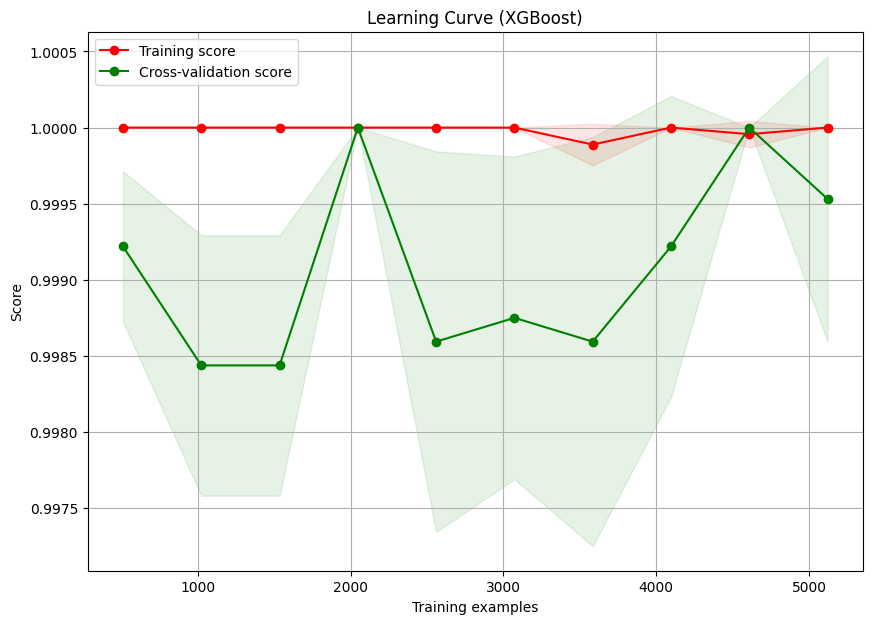

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Wrap the trained XGBoost model in an XGBClassifier for scikit-learn compatibility
# The parameters should be the same as used for training
estimator = XGBClassifier(objective="binary:logistic", max_depth=50, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

# Fit the estimator to get the feature names correctly handled by learning_curve
estimator.fit(x_train, y_train)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator,
    X=x_train, y=y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 7))
plt.title("Learning Curve (XGBoost)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()